Import statements, place any extra import statements below.

In [1]:
from core.__init__ import Explora
import os

os.environ['DB_PASS']="pandatasucks"

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[BlockchainClient] backend module://ipykernel.pylab.backend_inline version unknown


Initialize Explora.

In [2]:
explora = Explora()

Enter the name of the category of interest.

In [4]:
explora.category_name()

Text(value='', description='Category:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Category: mnist has no data providers.


get_datasets() returns a list of Dataset objects.

Each Dataset object **dataset** has three attributes.

1. **dataset.uuid** (type _str_) is the unique identifier for **dataset** across all datasets of all data providers.
2. **dataset.sample** (type _DataFrame_) is the sample data for **dataset**.
3. **dataset.metadata** (type _DataFrame_) is the metadata for **dataset**.

To save the Dataset objects, run the following cell.

In [6]:
explora.get_datasets()[0].uuid

'0fcf9cbb-39df-4ad6-9042-a64c87fecfb3'

Now you can visualize the data.

Depending on the plot of choice:
- Histogram (generates histogram): index of the dataset, column name of the corresponding dataset json.
- Scatter (generates scatter plot): index of the dataset, column names of the corresponding dataset json.
- Compare Using Scatter (generates a scatter plot of two datasets using common columns in them): indices of the datasets, column names of the corresponding dataset json (they must both have the same columns for this to make sense).
- Describe (generates a summary of one dataset): index of the dataset and column name of the corresponding dataset json.
- Compare Using Columns (generates a summary of two datasets using specific columns): index of the datasets, column name of each corresponding dataset json (two column names, one for each dataset).



In [17]:
explora.visualization_parameters()

RadioButtons(description='Method:', options=('histogram', 'scatter', 'compare using scatter', 'describe', 'compare using describe'), value='histogram')

Text(value='', description='Dataset 1', placeholder='')

Text(value='', description='Dataset 2', placeholder='')

Text(value='', description='Column 1:', placeholder='')

Text(value='', description='Column 2:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Run this cell to visualize using the parameters above.

In [20]:
explora.visualize()

(25%        0
 50%        0
 75%        0
 count    300
 max        0
 mean       0
 min        0
 std        0
 Name: pixel5, dtype: int64, 25%         0
 50%         0
 75%         0
 count    1200
 max         0
 mean        0
 min         0
 std         0
 Name: pixel5, dtype: int64)

Enter what datasets you would like to train on and submit.

In [7]:
explora.select_datasets()

Tab(children=(VBox(children=(Text(value='', description='UUID'), Text(value='', description='Label Column Name', style=DescriptionStyle(description_width='initial')), HBox(children=(Button(description='Add Dataset', style=ButtonStyle()), Button(description='Remove Dataset', style=ButtonStyle()))))),), _titles={'0': 'Dataset 1'})

Button(description='Submit', style=ButtonStyle())

Enter information on how you want your model to be trained and submit.

In [8]:
explora.parameters()

Text(value='', description='Batch Size:', placeholder='')

Text(value='', description='Epochs:', placeholder='')

Text(value='', description='Split:', placeholder='')

Text(value='', description='Avg Type:', placeholder='')

Text(value='', description='Opt Type:', placeholder='')

Text(value='', description='# of Rounds:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Set up your model and assign it to the following variable.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model = Sequential([
        Dense(32, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
sgd = optimizers.SGD(lr=0.00001)
model.compile(
            optimizer=sgd,
            loss='sparse_categorical_crossentropy',
            metrics=['acc']
)

Now run the following cell to train your model. As it runs, you will see statistics of training.

Statistics for Dataset with UUID 0fcf9cbb-39df-4ad6-9042-a64c87fecfb3
	Round Number: 1


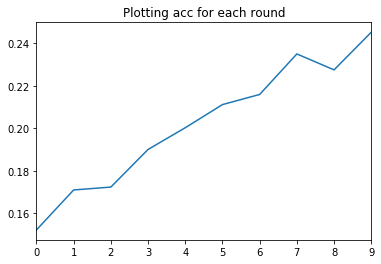

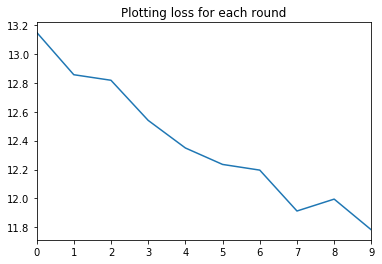

In [ ]:
explora.conduct_dml(model)

And that's it!

Check statistics:

In [9]:
explora.num_rounds = 11 #current num_rounds is 10, so try posting with num_round = 11 to see below line terminate
# explora.job_uud = 'pandata'

Statistics for Dataset with UUID sucks
	Round Number: 11


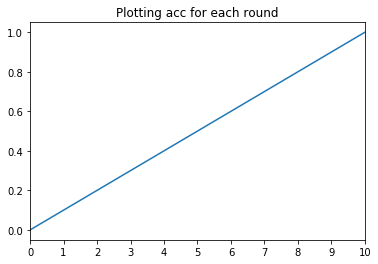

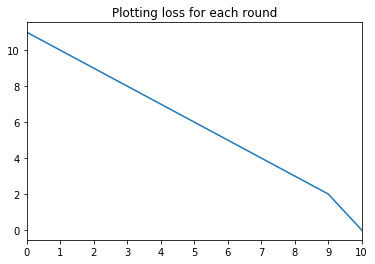

In [4]:
explora._training_statistics()

In [9]:
explora.status_server_client.get_latest_stats('pandata')['sucks']['dataset_stats']['training_history']

{'acc': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'loss': [11, 10, 9, 8, 7, 6, 5, 4, 3, 2]}

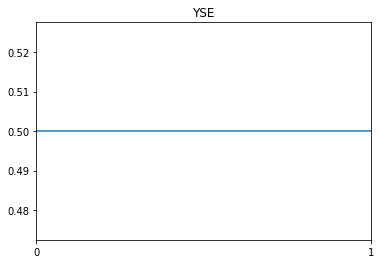

In [14]:
import pandas as pd
series = pd.Series([0.5, 0.5])
series.plot(kind='line', title='YSE', xticks=range(len(series)))

In [9]:
print_then_bye()

hello


Check ED_component

In [11]:
df1 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df1.head()

,A,B,C,D
0,-0.995234,-1.038193,0.740458,-0.669956
1,-0.505390,1.707781,0.795177,-0.581804
2,0.001436,0.330923,-0.257669,-0.183864
3,-2.000372,0.147054,-0.808265,-0.248288
4,0.383359,0.729975,-1.207394,-0.115939


In [12]:
EDComponent = EDComponent()

In [13]:
EDComponent.histogram(df1, 'A');

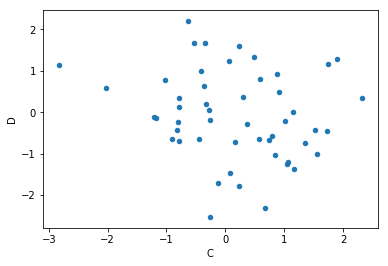

In [14]:
EDComponent.scatter(df1, 'C', 'D');

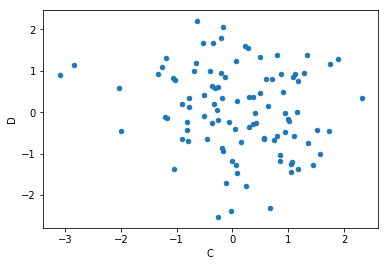

In [15]:
EDComponent.scatter_compare(df1, df2, 'C', 'D');

In [16]:
EDComponent.statistics(df1, 'D');

In [17]:
EDComponent.statistics_columns(df1, df2, 'A', 'B');